# **Binary Classification Problem**

### import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import scale, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectFromModel
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Diabetes = pd.read_csv('/content/diabetes.csv')
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Attributes Description:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

# **Data Exploration**

In [ ]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
Diabetes.duplicated().sum()

0

In [ ]:
Diabetes['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='count'>

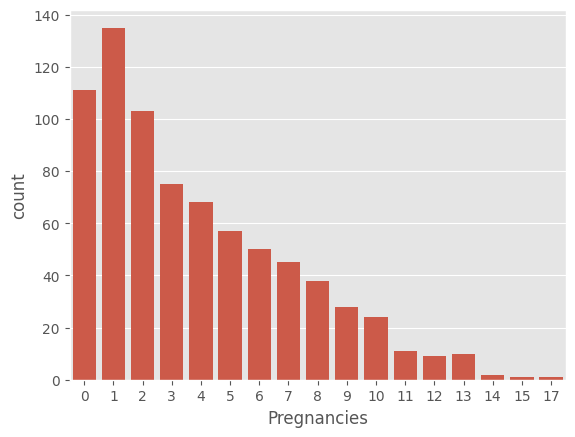

In [ ]:
sns.countplot(data = Diabetes ,x='Pregnancies')

- insight: The number of pregnancies gradually decreases



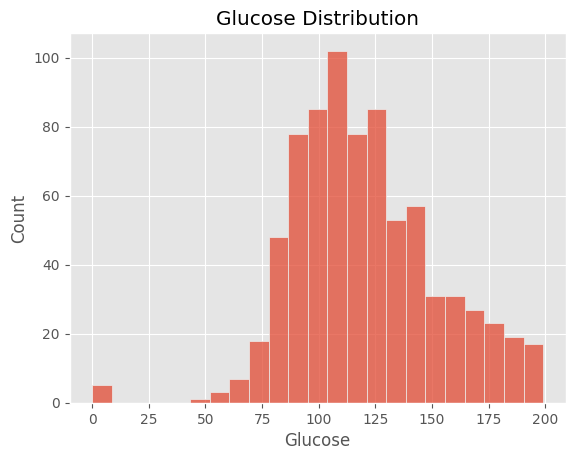

In [ ]:
sns.histplot(Diabetes['Glucose']).set_title('Glucose Distribution')
plt.show()


- insight: Glucose is more distributed between 70 and 80

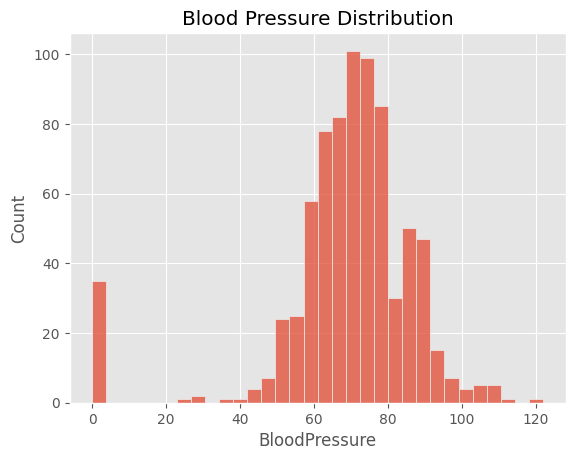

In [ ]:
sns.histplot(Diabetes['BloodPressure']).set_title('Blood Pressure Distribution')
plt.show()

- insight: Blood pressure is more distributed between 70 and 80 mm Hg

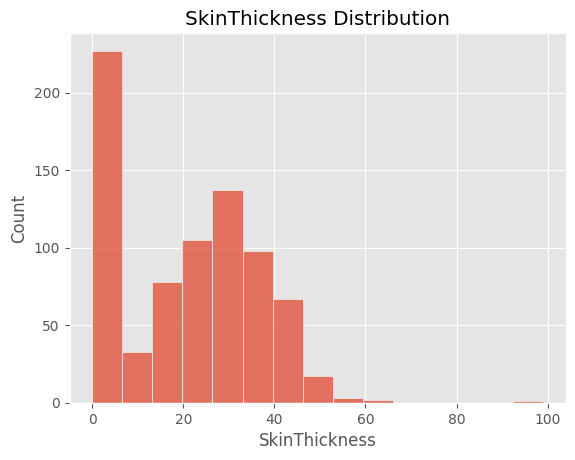

In [ ]:
sns.histplot(Diabetes['SkinThickness']).set_title('SkinThickness Distribution')
plt.show()

- insight: SkinThickness is more distributed between 0 and 50 mm

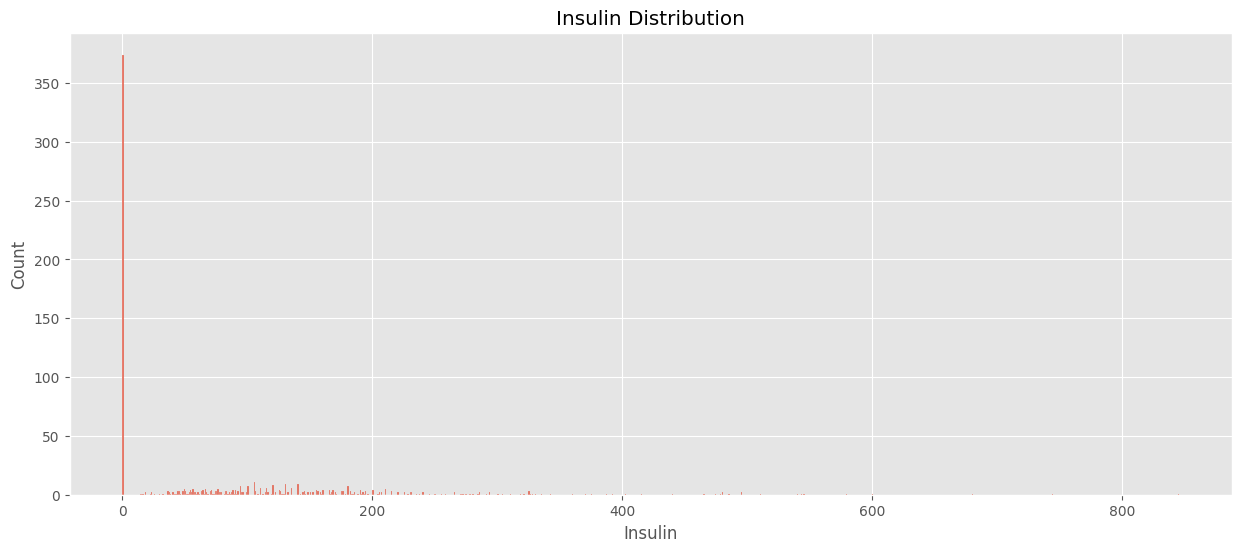

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(Diabetes['Insulin'],binwidth=1).set_title('Insulin Distribution')
plt.show()

- insight: Insulin is normal distributed between 0 and 1 mu U/ml

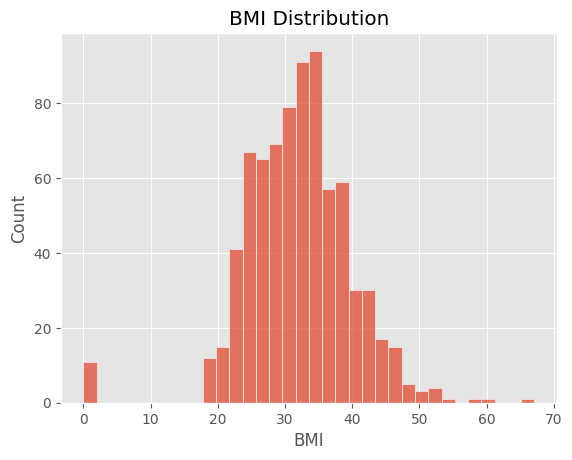

In [ ]:
sns.histplot(Diabetes['BMI']).set_title('BMI Distribution')
plt.show()

- insight: BMI is more distributed between 25 and 40 kg/(height in m)^2


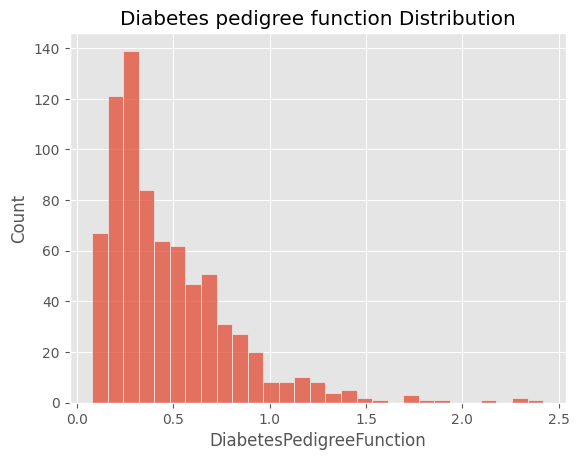

In [ ]:
sns.histplot(Diabetes['DiabetesPedigreeFunction']).set_title('Diabetes pedigree function Distribution')
plt.show()

- insight: Diabetes pedigree function is more distributed between 0.1 and 0.8


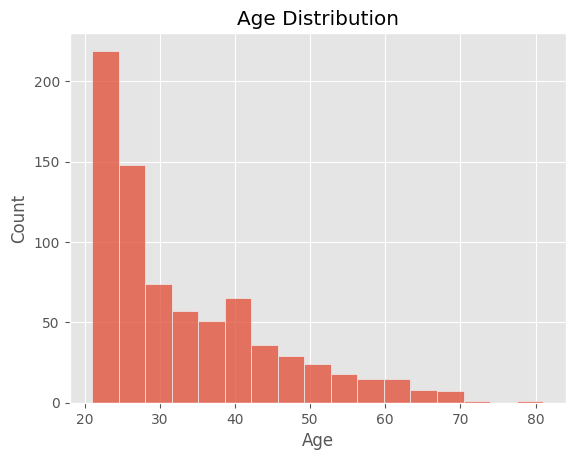

In [ ]:
sns.histplot(Diabetes['Age']).set_title('Age Distribution')
plt.show()

- insight: Age is more distributed between 22 and 28

In [ ]:
Diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

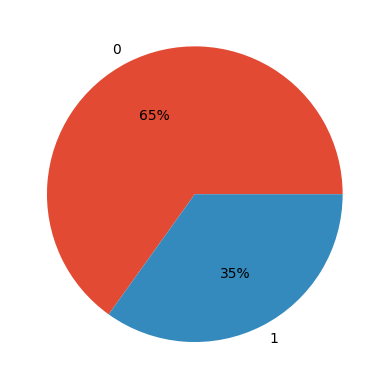

In [ ]:
plt.pie(Diabetes['Outcome'].value_counts() , autopct='%.0f%%', labels=[0,1])
plt.show()

- insight: (Does not have diabetes) 0 is more than 1 (have diabetes)


### comparing each feature with the dependent feature

<Axes: xlabel='Pregnancies', ylabel='count'>

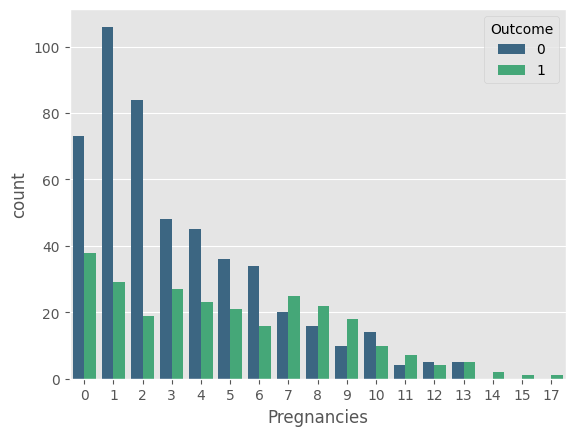

In [ ]:
sns.countplot(data=Diabetes, x='Pregnancies', hue='Outcome', palette='viridis')

- insight: **After 7 time pregnancies** number of patient has **diabtic is more**

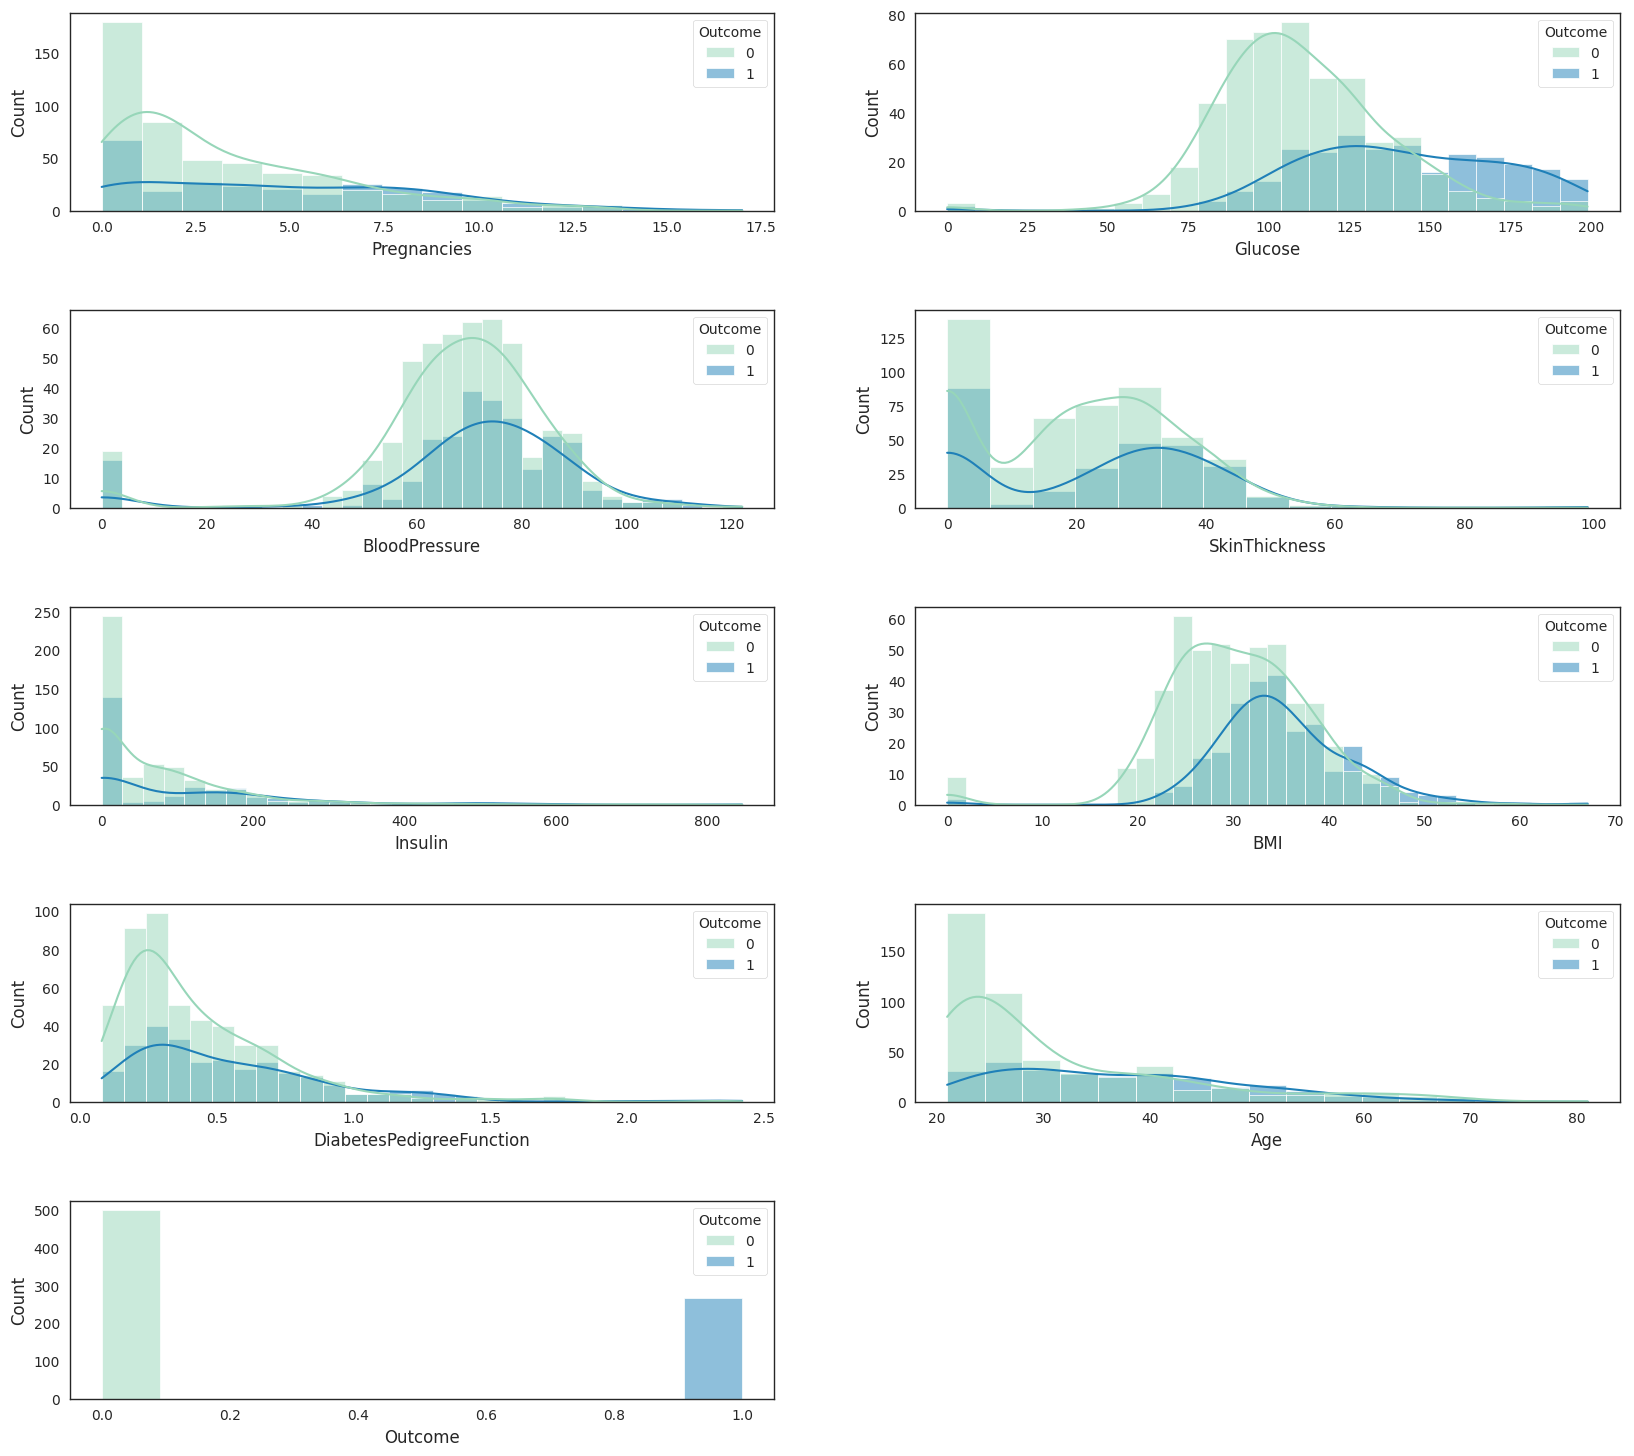

In [ ]:
plt.figure(figsize=(20,18))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in Diabetes.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=Diabetes, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

### summary insights :
- Glucose levels are higher for patients has diabetes
- Insulin levels are higher for patients has diabetes
- Diabetes pedigree function are higher for patients has diabetes
- The older you are, the more likely you are to be positive

### correlation between each attributes

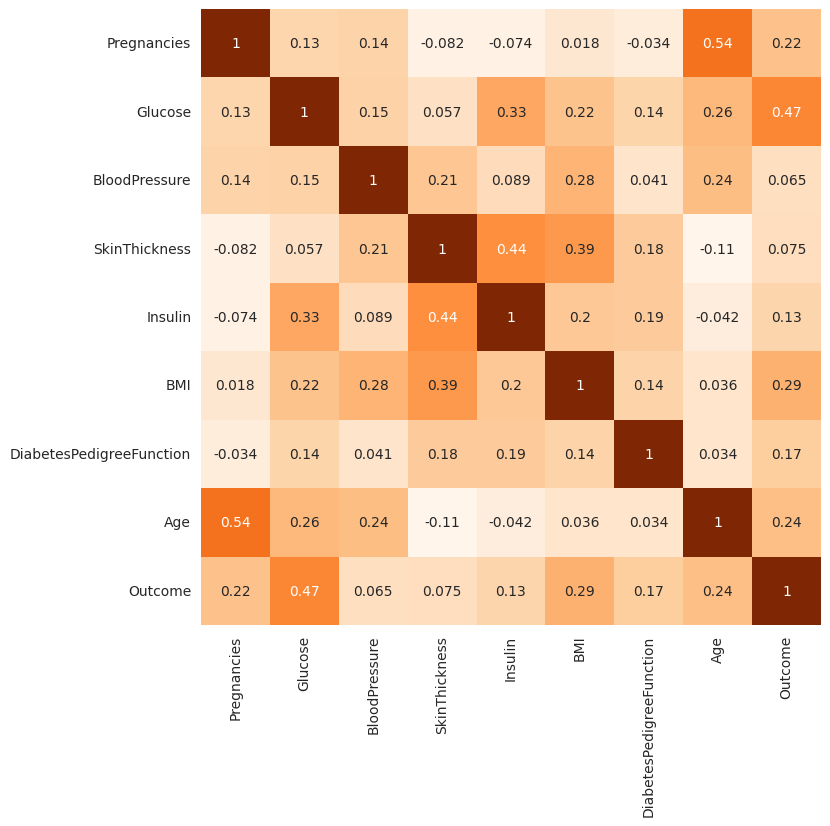

In [ ]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(Diabetes.corr(), annot=True,cmap='Oranges',cbar=False)

- there is no high correlation between any feature and other

# **Data Preprocessing**

### Split data to train and validation

In [ ]:
from sklearn.model_selection import train_test_split

y = Diabetes["Outcome"]
x = Diabetes.drop("Outcome",axis=1)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

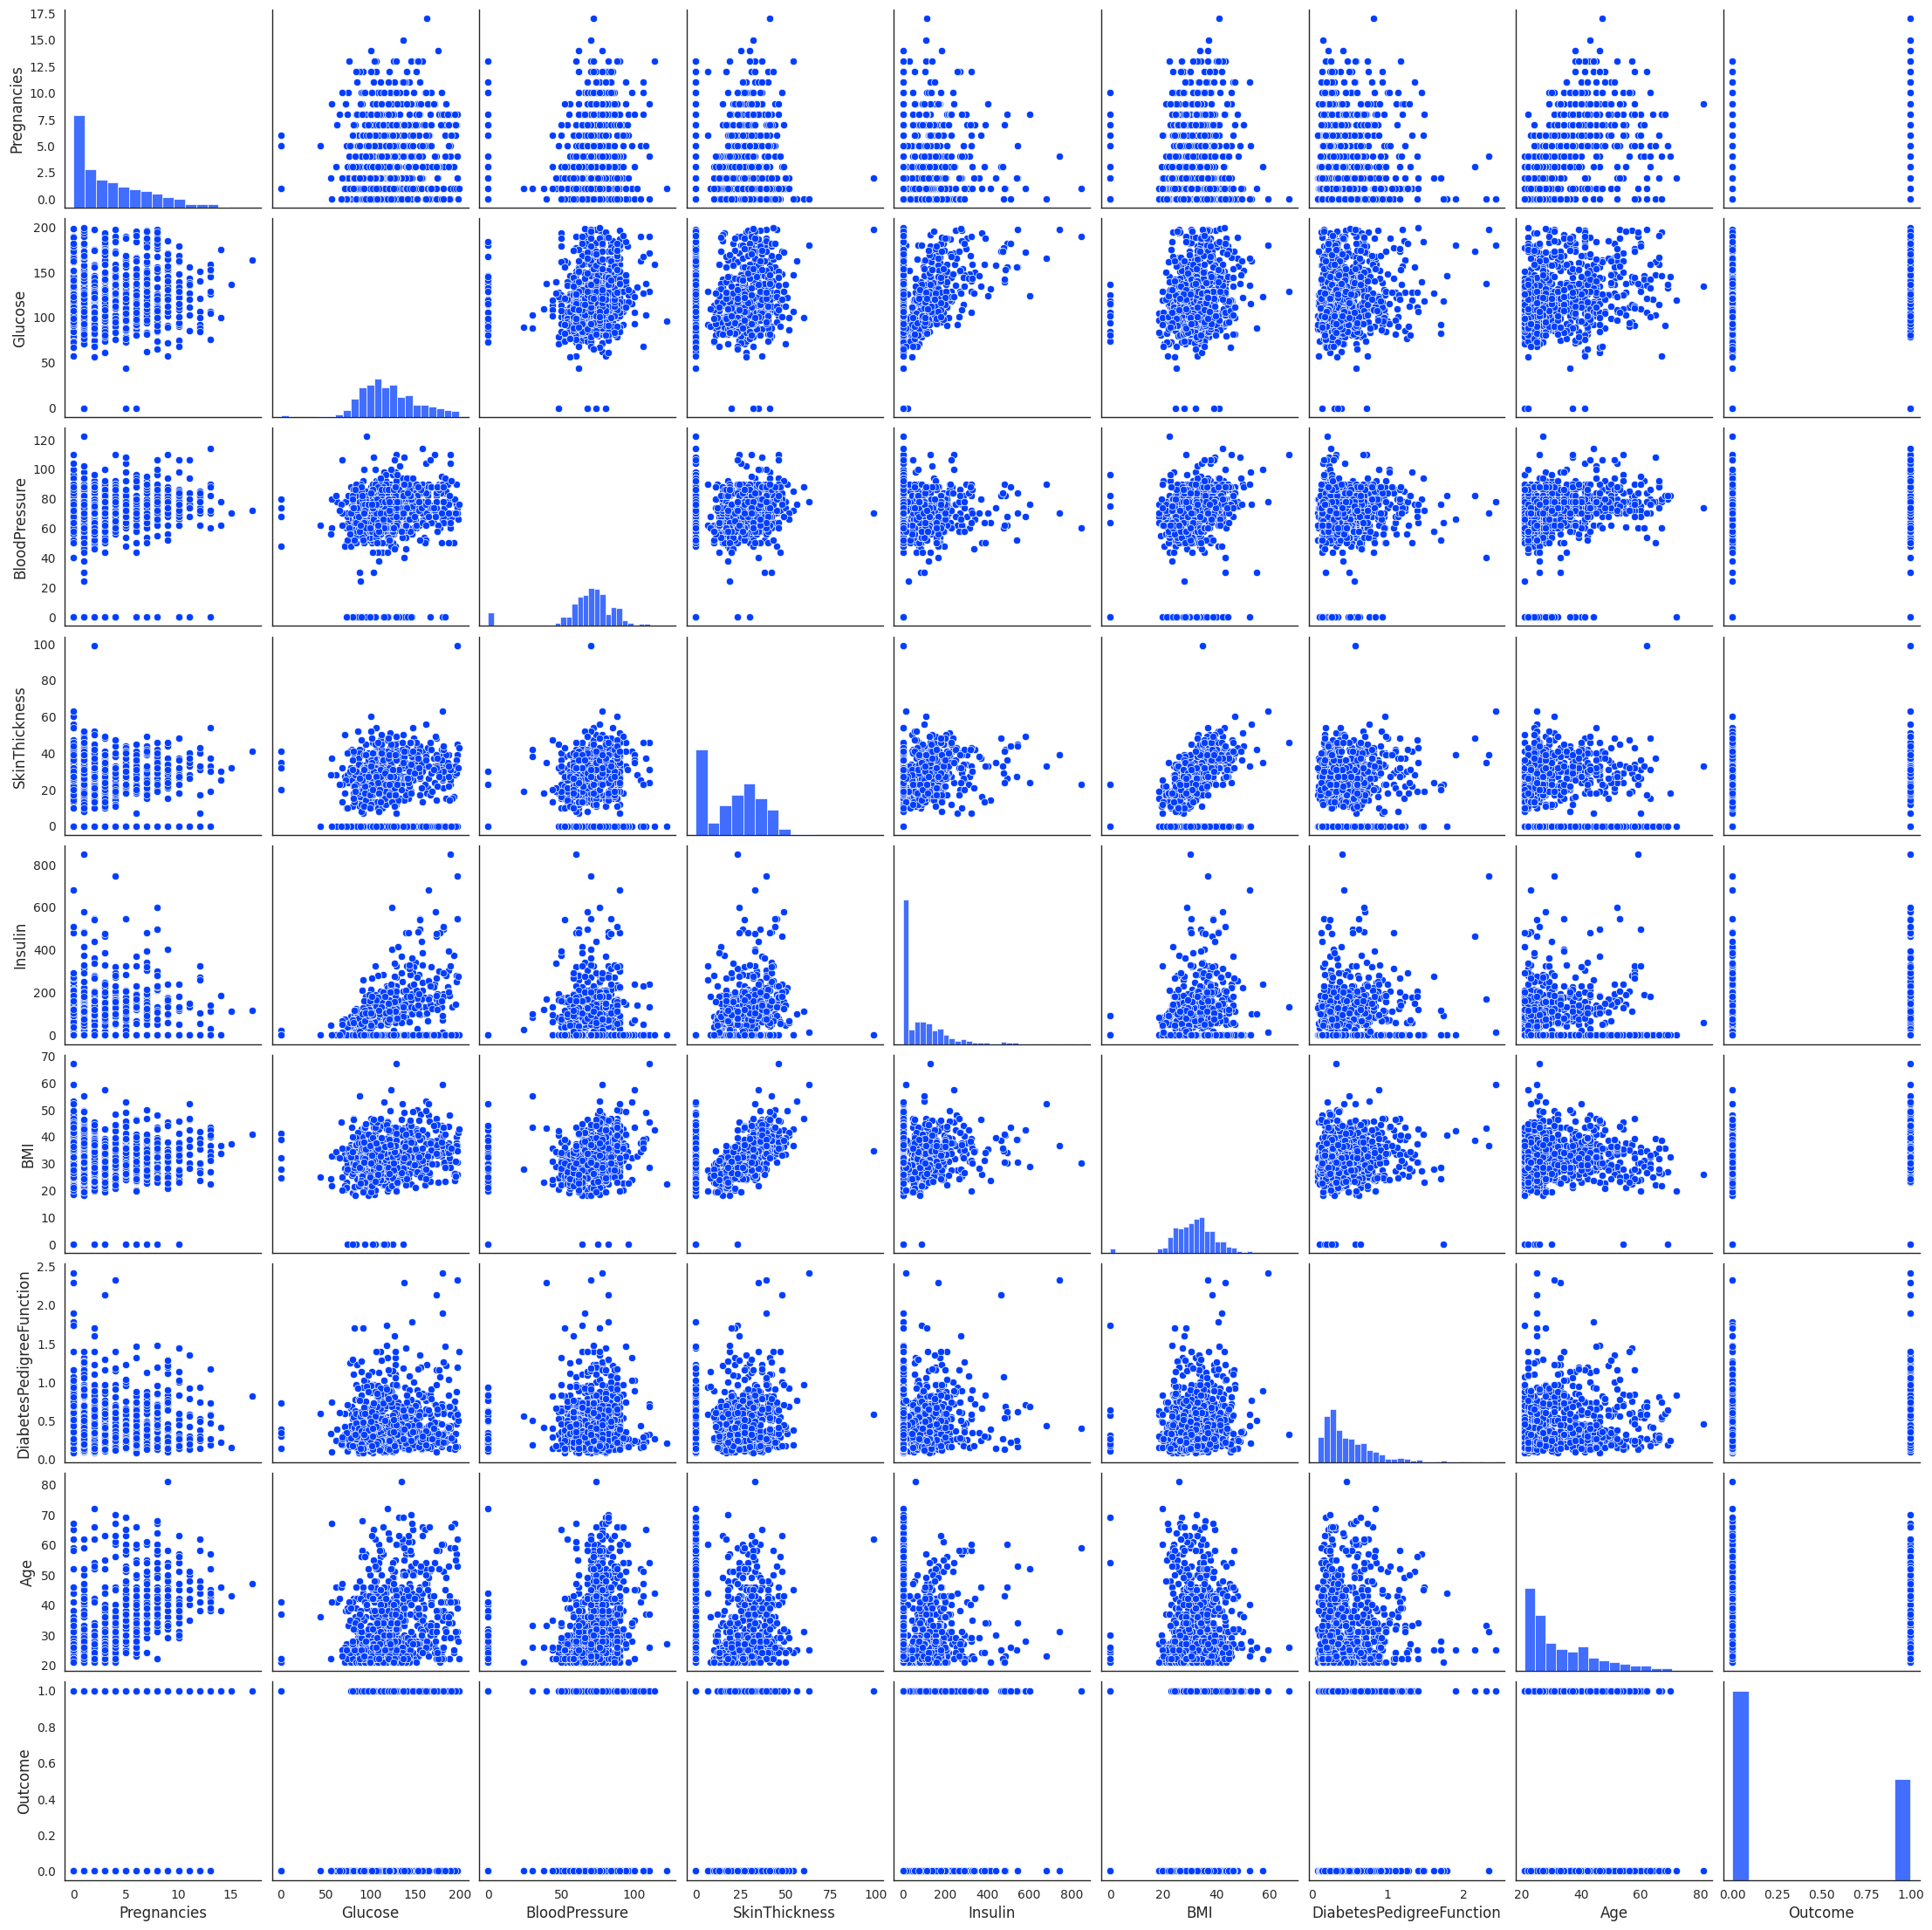

In [ ]:
sns.pairplot(data = Diabetes)

- As shown above, the ratio of the value of zero in the SkinThickness and Insulin features seems to be high. Let's change the corresponding values to the mean value of each feature.

- However, a zero value may be meaningful to the corresponding feature. If you have an expert with expertise in diabetes, you will be able to confirm that your decision is correct. However, since there is no such domain knowledge or friends, we will first replace the corresponding value with the mean value.

In [ ]:
zero_to_nan = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
x_train[zero_to_nan] = x_train[zero_to_nan].replace(0,np.NaN)
x_test[zero_to_nan] = x_test[zero_to_nan].replace(0,np.NaN)

In [ ]:
x_train['BloodPressure'] = x_train.groupby('Pregnancies')['BloodPressure'].transform(lambda val : val.fillna(val.median()))
x_train['Glucose'] = x_train.groupby('Pregnancies')['Glucose'].transform(lambda val : val.fillna(val.median()))
x_train['BMI'] = x_train.groupby('Pregnancies')['BMI'].transform(lambda val : val.fillna(val.median()))
x_train['SkinThickness'] = x_train.groupby('Pregnancies')['SkinThickness'].transform(lambda val : val.fillna(val.median()))
x_train['Insulin'] = x_train.groupby('Pregnancies')['Insulin'].transform(lambda val : val.fillna(val.median()))
x_train['Insulin'] = x_train.groupby('Age')['Insulin'].transform(lambda val : val.fillna(val.median()))

x_test['BloodPressure'] = x_test.groupby('Pregnancies')['BloodPressure'].transform(lambda val : val.fillna(val.median()))
x_test['Glucose'] = x_test.groupby('Pregnancies')['Glucose'].transform(lambda val : val.fillna(val.median()))
x_test['BMI'] = x_test.groupby('Pregnancies')['BMI'].transform(lambda val : val.fillna(val.median()))
x_test['SkinThickness'] = x_test.groupby('Pregnancies')['SkinThickness'].transform(lambda val : val.fillna(val.median()))
x_test['Insulin'] = x_test.groupby('Pregnancies')['Insulin'].transform(lambda val : val.fillna(val.median()))
x_test['Insulin'] = x_test.groupby('Age')['Insulin'].transform(lambda val : val.fillna(val.median()))

### over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train , y_train = smote.fit_resample(x_train,y_train)

x_train.shape,y_train.shape

((802, 8), (802,))

### create new features

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
def set_BMI(row):
    if row["BMI"] < 18.5:
        return "Underweight"
    elif row["BMI"] > 18.5 and row["BMI"] <= 24.9:
        return "Normal"
    elif row["BMI"] > 24.9 and row["BMI"] <= 29.9:
        return "Overweight"
    elif row["BMI"] > 29.9 and row["BMI"] <= 34.9:
        return "Obesity 1"
    elif row["BMI"] > 34.9 and row["BMI"] <= 39.9:
        return "Obesity 2"
    else:
        return "Obesity 3"

x_train["NewBMI"] = x_train.apply(set_BMI, axis=1)
x_test["NewBMI"] = x_test.apply(set_BMI, axis=1)

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI
0,2,84.0,68.0,24.0,105.0,30.45,0.304,21,Obesity 1
1,9,112.0,82.0,24.0,130.0,28.20,1.282,50,Overweight
2,1,139.0,46.0,19.0,83.0,28.70,0.654,22,Overweight
3,0,161.0,50.0,30.5,125.0,21.90,0.254,65,Normal
4,6,134.0,80.0,37.0,370.0,46.20,0.238,46,Obesity 3


In [ ]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

x_train["NewInsulinScore"] = x_train.apply(set_insulin, axis=1)
x_test["NewInsulinScore"] = x_test.apply(set_insulin, axis=1)

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI,NewInsulinScore
0,2,84.0,68.0,24.0,105.0,30.45,0.304,21,Obesity 1,Normal
1,9,112.0,82.0,24.0,130.0,28.20,1.282,50,Overweight,Normal
2,1,139.0,46.0,19.0,83.0,28.70,0.654,22,Overweight,Normal
3,0,161.0,50.0,30.5,125.0,21.90,0.254,65,Normal,Normal
4,6,134.0,80.0,37.0,370.0,46.20,0.238,46,Obesity 3,Abnormal


In [ ]:
def set_Glucose(row):
    if row["Glucose"] < 140:
        return "Normal"
    elif row["Glucose"] >= 140 and row["Glucose"] <= 199:
        return "prediabetes"
    else:
        return "High"

x_train["NewGlucose"] = x_train.apply(set_Glucose, axis=1)
x_test["NewGlucose"] = x_test.apply(set_Glucose, axis=1)

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI,NewInsulinScore,NewGlucose
0,2,84.0,68.0,24.0,105.0,30.45,0.304,21,Obesity 1,Normal,Normal
1,9,112.0,82.0,24.0,130.0,28.20,1.282,50,Overweight,Normal,Normal
2,1,139.0,46.0,19.0,83.0,28.70,0.654,22,Overweight,Normal,Normal
3,0,161.0,50.0,30.5,125.0,21.90,0.254,65,Normal,Normal,prediabetes
4,6,134.0,80.0,37.0,370.0,46.20,0.238,46,Obesity 3,Abnormal,Normal


### One Hot Encoding

In [ ]:
x_train = pd.get_dummies(x_train, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)
x_test = pd.get_dummies(x_test, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_prediabetes
668,6,98,58.0,33.0,190.0,34.0,0.430,43,1,0,0,0,0,0,0
324,2,112,75.0,32.0,107.5,35.7,0.148,21,0,1,0,0,0,1,0
624,2,108,64.0,32.0,107.5,30.8,0.158,21,1,0,0,0,0,1,0
690,8,107,80.0,36.0,140.0,24.6,0.856,34,0,0,0,0,0,1,0
473,7,136,90.0,32.0,234.0,29.9,0.210,50,0,0,0,1,0,0,0


In [ ]:
x_test.reset_index(inplace = True)
x_test.drop('index',axis=1,inplace=True)
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_prediabetes
0,6,98,58.0,33.0,190.0,34.0,0.430,43,1,0,0,0,0,0,0
1,2,112,75.0,32.0,107.5,35.7,0.148,21,0,1,0,0,0,1,0
2,2,108,64.0,32.0,107.5,30.8,0.158,21,1,0,0,0,0,1,0
3,8,107,80.0,36.0,140.0,24.6,0.856,34,0,0,0,0,0,1,0
4,7,136,90.0,32.0,234.0,29.9,0.210,50,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,9,165,88.0,34.0,168.0,30.4,0.302,49,1,0,0,0,0,0,1
150,1,77,56.0,30.0,56.0,33.3,1.251,24,1,0,0,0,0,1,0
151,8,95,72.0,36.0,140.0,36.8,0.485,57,0,1,0,0,0,1,0
152,2,146,70.0,38.0,360.0,28.0,0.337,29,0,0,0,1,0,0,1


###handling outliers using (Log Transformation & Winsorizing)


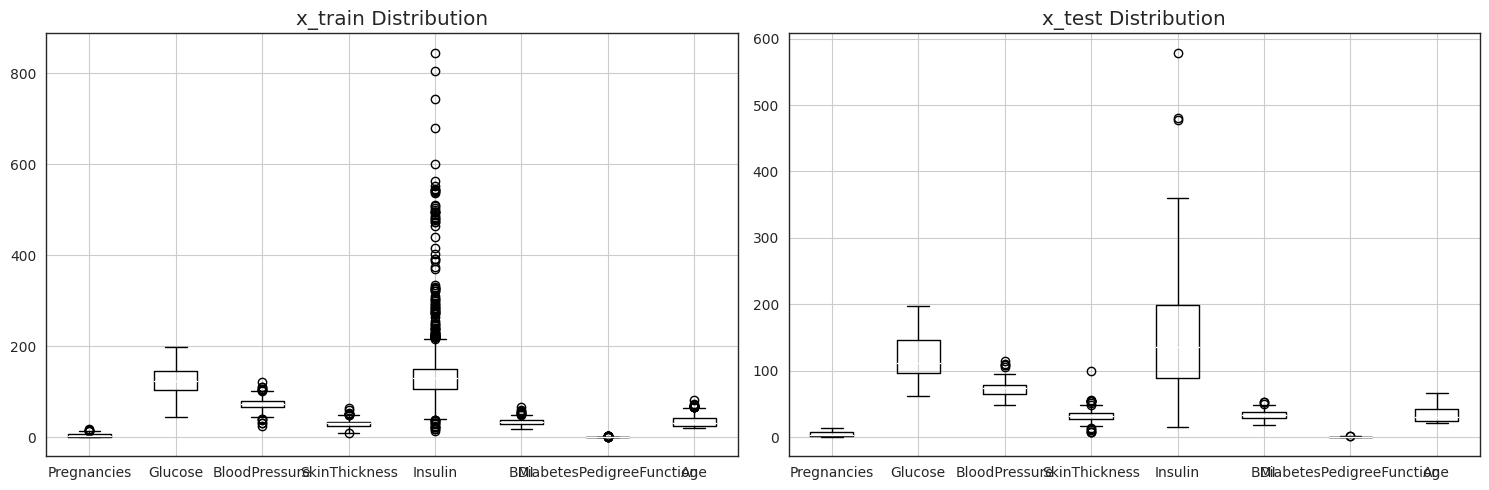

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

x_train.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')

x_test.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

for column_name in x_train.columns[:8]:

  x_train[column_name] = np.log1p(x_train[column_name])
  x_train[column_name] = winsorize(x_train[column_name], limits=[0.05, 0.05])

  x_test[column_name] = np.log1p(x_test[column_name])
  x_test[column_name] = winsorize(x_test[column_name], limits=[0.05, 0.05])

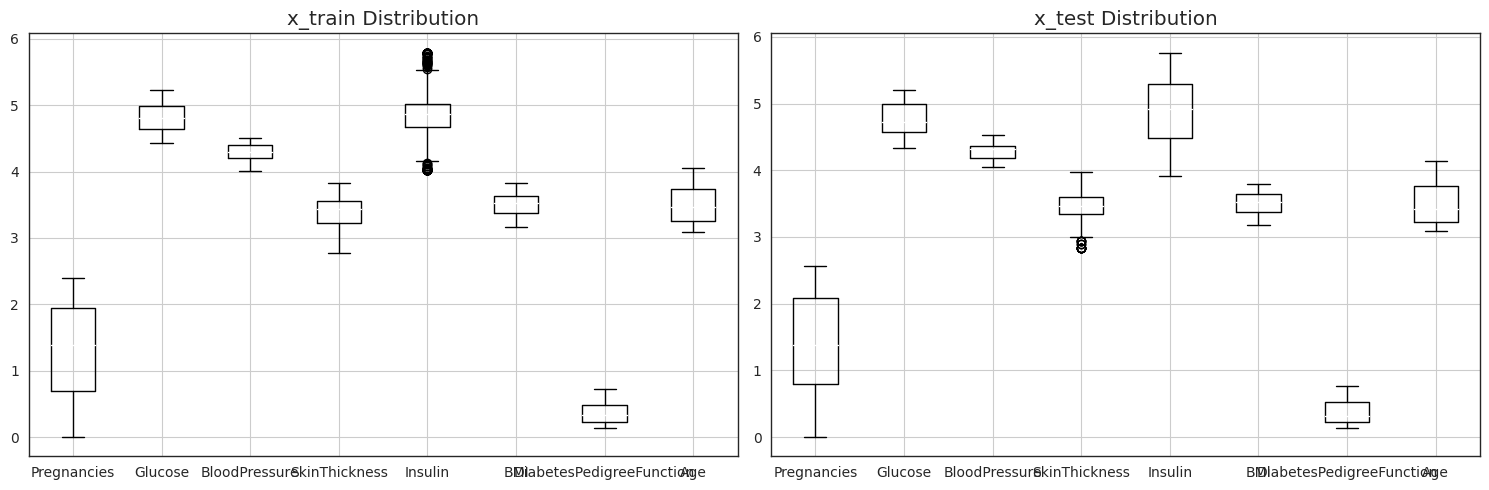

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

x_train.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')

x_test.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

# **Build Model**

KNN: 0.749398 (0.051823)
RF: 0.831744 (0.045849)
XGB: 0.788086 (0.047765)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 361, number of negative: 360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 721, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500693 -> initscore=0.002774
[LightGBM] [Info] Start training from score 0.002774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

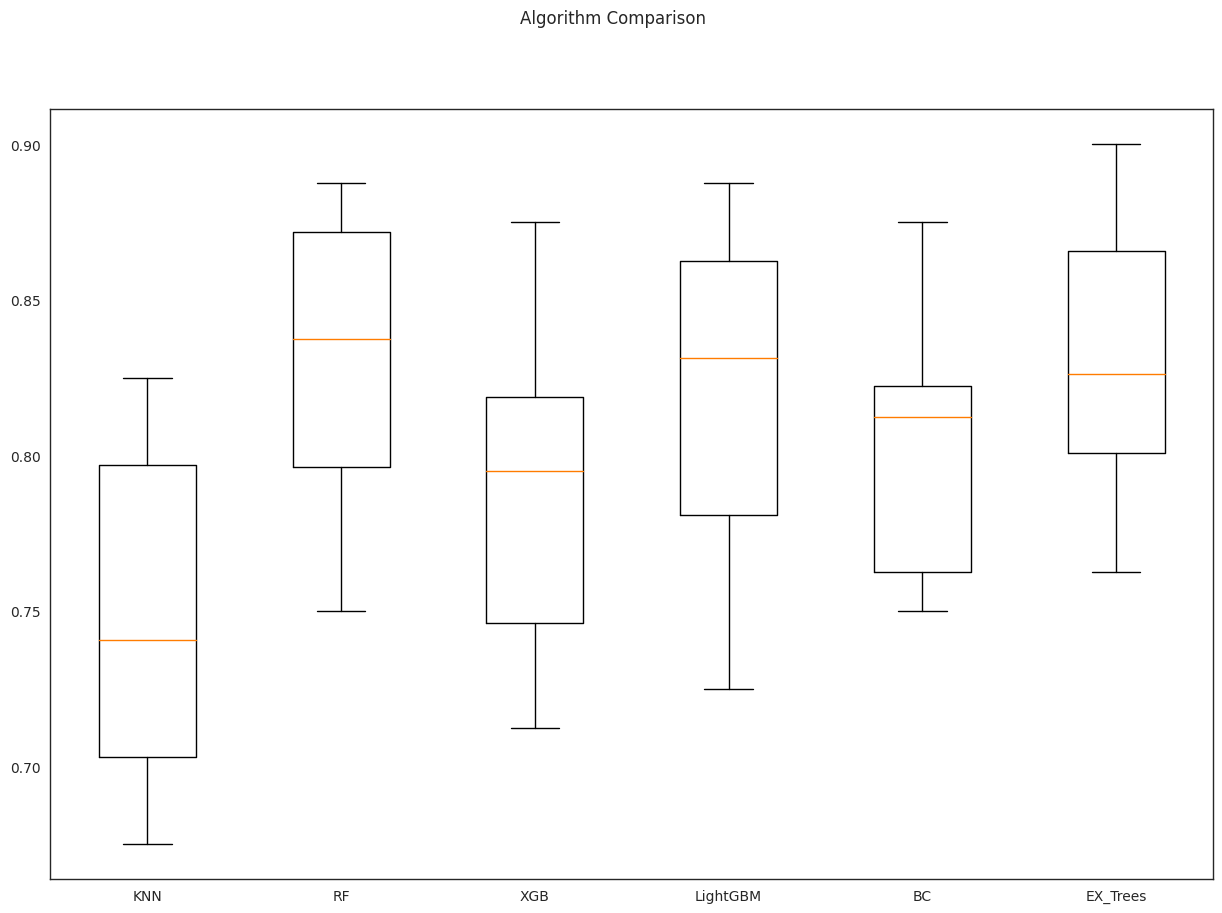

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("BC", BaggingClassifier(random_state = 12345)))
models.append(("EX_Trees", ExtraTreesClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:

        kfold = KFold(n_splits = 10)

        cv_results = cross_val_score(model, x_train, y_train, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###LGBMClassifier

In [ ]:
LGBM_model = LGBMClassifier()
LGBM_model.fit(x_train,y_train)
y_pred = LGBM_model.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 401, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7467532467532467,
 0.7636363636363637,
 0.6176470588235294,
 0.6829268292682927)

<Axes: >

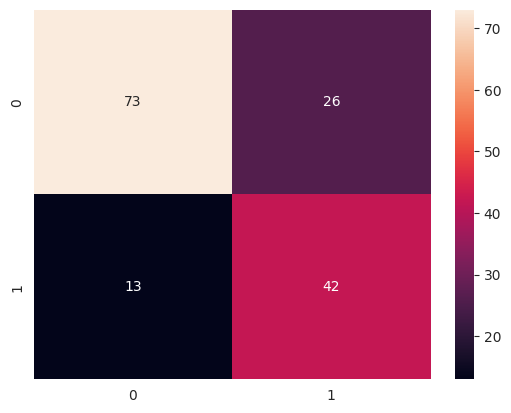

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

### Random Forest Classifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RD_model = RandomForestClassifier()
RD_model.fit(x_train,y_train)
y_pred = RD_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7597402597402597, 0.7636363636363637, 0.6363636363636364, 0.694214876033058)

<Axes: >

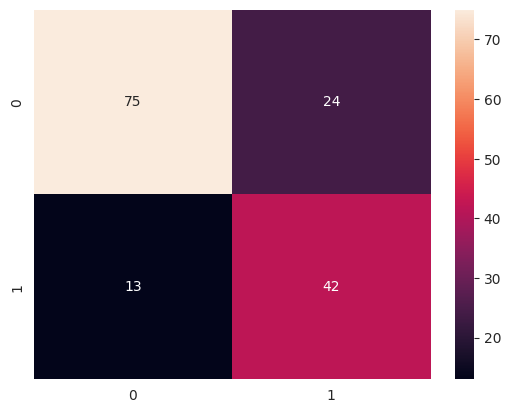

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
BG_model = BaggingClassifier()
BG_model.fit(x_train,y_train)
y_pred = BG_model.predict(x_test)

<Axes: >

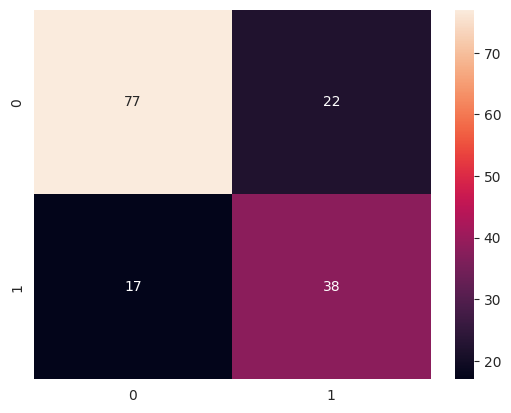

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7467532467532467,
 0.6909090909090909,
 0.6333333333333333,
 0.6608695652173913)

### Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

EX_model = ExtraTreesClassifier()
EX_model.fit(x_train,y_train)
y_pred = EX_model.predict(x_test)

<Axes: >

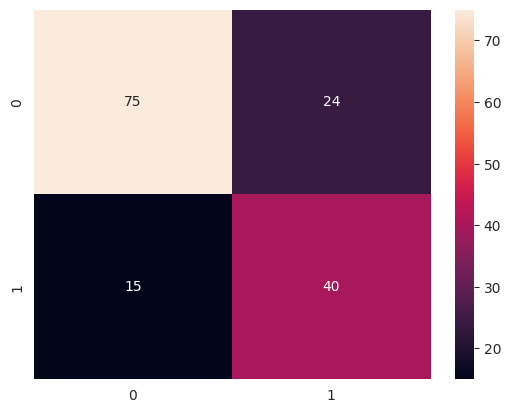

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7467532467532467, 0.7272727272727273, 0.625, 0.6722689075630253)

# Hyperparameter Tuning

In [ ]:
!pip install --quiet optuna
import optuna

def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    random_state = trial.suggest_int('random_state', 1, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create and train the Random Forest model with the suggested hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )
    rf_model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(x_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Set up the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)
best_rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

[I 2024-02-05 20:06:46,115] A new study created in memory with name: no-name-33e83c34-296d-4d22-96e0-508e1a720587
[I 2024-02-05 20:06:46,605] Trial 0 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 157, 'random_state': 89, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.7727272727272727.
[I 2024-02-05 20:06:46,800] Trial 1 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 61, 'random_state': 73, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 0 with value: 0.7727272727272727.
[I 2024-02-05 20:06:47,022] Trial 2 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 73, 'random_state': 52, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.7727272727272727.
[I 2024-02-05 20:06:47,265] Trial 3 finished with value: 0.766233766233766

Best Hyperparameters: {'n_estimators': 84, 'random_state': 171, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto'}
Accuracy on Test Set: 0.7792207792207793


# **Best Model With Best Hyperparameter**

In [ ]:
rf_model = RandomForestClassifier(
        n_estimators=112,
        max_depth=18,
        min_samples_split=3,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=133
    )
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

<Axes: >

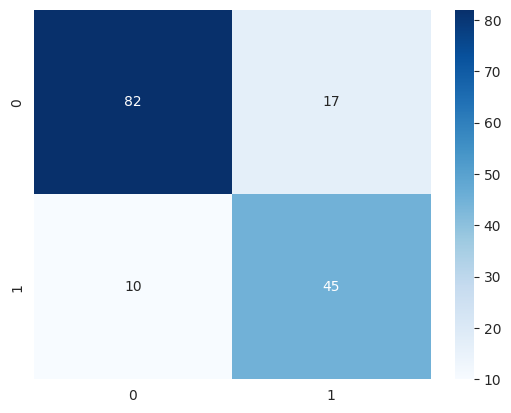

In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True,cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.8246753246753247,
 0.8181818181818182,
 0.7258064516129032,
 0.7692307692307693)

### creating Pipelines

In [ ]:
from imblearn.pipeline import make_pipeline

numeric_features = x_train.loc[:,'Pregnancies':'Age'].columns

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('impute', SimpleImputer(strategy='median')),
            ('log_transform', FunctionTransformer(np.log1p, validate=False)),
            ('winsorize', FunctionTransformer(lambda x: winsorize(x, limits=[0.01, 0.01]), validate=False))
        ]), numeric_features)
    ],
    remainder='passthrough'
)


# Create a pipeline with preprocessing and Random Forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=112,
        max_depth=18,
        min_samples_split=3,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=133
    ))
])

# Train the pipeline
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8116883116883117


### Saving The Model

In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'rf_model.joblib')

# Load the model
loaded_model = joblib.load('rf_model.joblib')